In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
import seaborn as sns
import string
#https://stackoverflow.com/questions/19726663/how-to-save-the-pandas-dataframe-series-data-as-a-figure
import six
import math

In [2]:
tbpath = "../../fits/"
productpath = "../../postfit_derivatives/"

In [3]:
rois = []
df = pd.read_csv(tbpath + 'fit_table_reweighted.csv') 
rois += list(df.roi.unique())
  
rois = list(set(rois))
rois.remove('US')
rois.remove('Gambia')
#sort within US and among other coutries then union back
roi_us = np.sort([i for i in rois if i[:2]=='US'])[::-1]
roi_other = np.sort([i for i in rois if i[:2]!='US'])[::-1]
rois = list(roi_us) + list(roi_other)

print(df)

              roi quantile         R0  car (week 0)  car (week 1)  \
0       AA_Global     mean   3.494587      0.100231      0.100732   
1       AA_Global      std   1.541273      0.034553      0.052667   
2     Afghanistan    0.025   1.468418      0.016030      0.012981   
3     Afghanistan     0.25   2.446412      0.038256      0.037566   
4     Afghanistan      0.5   3.436230      0.064816      0.068497   
...           ...      ...        ...           ...           ...   
1188     Zimbabwe      0.5   3.479923      0.162644      0.220131   
1189     Zimbabwe     0.75   5.524083      0.469393      0.579358   
1190     Zimbabwe    0.975  12.009383      1.292761      1.383765   
1191     Zimbabwe     mean   4.307799      0.293625      0.370387   
1192     Zimbabwe      std   2.969391      3.959783      2.956896   

      car (week 2)  car (week 3)  car (week 4)  extra_std  ifr (week 0)  ...  \
0         0.103493      0.105365      0.096048   1.173057      0.002379  ...   
1         0

AA_Global
[0.01823967 0.04241168 0.06967841 0.11933414 0.37706928]


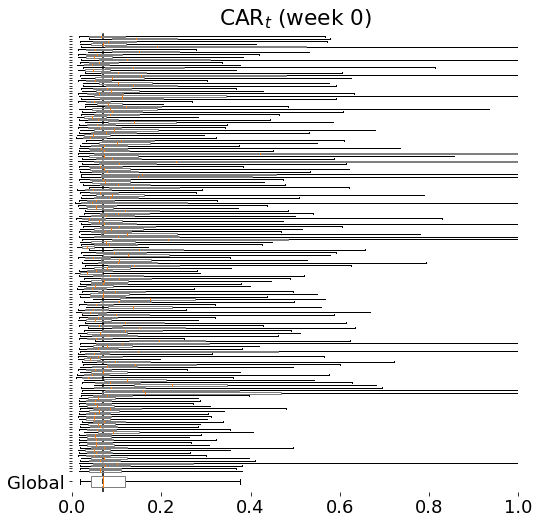

In [6]:
font = {'family' : 'sans-serif',
        'weight' : 'normal',
        'size'   : 18}

matplotlib.rc('font', **font)

def simpleaxis(ax):
    ax.spines['top'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)
    

def plot_table_data(col,ax):
    _025 = 0
    _25 = 0
    _5 = 0
    _75 = 0
    _975 = 0
    w = 0
    for j, roi in enumerate(rois):
        try:
            boxes = [
                {
                'x': 0,
                'label' : '',
                'whislo': df.loc[(df.roi==roi)&(df['quantile']=='0.025'), col].values[0],    # Bottom whisker position
                'q1'    : df.loc[(df.roi==roi)&(df['quantile']=='0.25'), col].values[0],    # First quartile (25th percentile)
                'med'   : df.loc[(df.roi==roi)&(df['quantile']=='0.5'), col].values[0],    # Median         (50th percentile)
                'q3'    : df.loc[(df.roi==roi)&(df['quantile']=='0.75'), col].values[0],     # Third quartile (75th percentile)
                'whishi': df.loc[(df.roi==roi)&(df['quantile']=='0.975'), col].values[0],    # Top whisker position
                'fliers': []        # Outliers
                }
            ]
            sigma2 = (df.loc[(df.roi==roi)&(df['quantile']=='std'), col].values[0])**2
            w += 1/sigma2
            _025 += 1/sigma2*df.loc[(df.roi==roi)&(df['quantile']=='0.025'), col].values[0]
            _25 += 1/sigma2*df.loc[(df.roi==roi)&(df['quantile']=='0.25'), col].values[0]
            _5 += 1/sigma2*df.loc[(df.roi==roi)&(df['quantile']=='0.5'), col].values[0]
            _75 += 1/sigma2*df.loc[(df.roi==roi)&(df['quantile']=='0.75'), col].values[0]
            _975 += 1/sigma2*df.loc[(df.roi==roi)&(df['quantile']=='0.975'), col].values[0]
            ax.bxp(boxes, widths = 0.5, positions=[j], showfliers=False, vert=False, patch_artist=True,
                   boxprops=dict(facecolor='none',edgecolor='gray'))
        except:
            print(roi)
    return _025,_25,_5,_75,_975,w,j


def plot_global(col,ax,q):
    boxes = [
            {
            'x': 0,
            'fontsize' : 10,
            'label' : 'Global',
            'whislo': q[0],    # Bottom whisker position
            'q1'    : q[1],   # First quartile (25th percentile)
            'med'   : q[2],    # Median         (50th percentile)
            'q3'    : q[3],     # Third quartile (75th percentile)
            'whishi': q[4],    # Top whisker position
            'fliers': []        # Outliers
            }
        ]
    ax.bxp(boxes, widths = 4, 
            positions=[-4], showfliers=False, vert=False, patch_artist=True,
               boxprops=dict(facecolor='none',edgecolor='gray'))
    return 

# roi = rois[0]
# col = theta
# print(df.loc[(df.roi==roi)&(df['quantile']=='0.025'), col])

# df['quantile']

theta = 'car (week 0)'
f,ax = plt.subplots(1,1,figsize=(8,8))

_025,_25,_5,_75,_975,w,j = plot_table_data(theta,ax)
q = np.array([_025,_25,_5,_75,_975])/w
print(q)
plot_global(theta,ax,q)
plt.subplots_adjust(hspace=0.2,wspace=1)
ax.axvline(q[2],color='k',linestyle='dashed')
# ax.yaxis.grid(True)
simpleaxis(ax)
ax.set_ylim((-8,len(rois)))
ax.set_xlim((0,1))
plt.subplots_adjust(top=0.9,bottom=0.1)
# ax.set_title(theta)
ax.set_title(r'CAR$_t$ (week 0)')
plt.savefig(productpath + theta + '_forestplot.png')
